#      Project 1:  Explore Weather Trends
    
  
  
    

### Collecting data

Using SQL Query , temperature data are extracted from database. Global temperature data are exported
to results_global_data.csv file and temperature data for city of Sarajevo are exported to results_by_city.csv file


#### SQL query used to extract the data:

1. SELECT *
2. FROM city_data
3. WHERE city = 'Sarajevo';

In [1]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing data
df_sarajevo = pd.read_csv(r"D:\Udacity\Weather trends\results_by_city.csv")
df_global = pd.read_csv(r"D:\Udacity\Weather trends\results_global_data.csv")

### Exploring data for better understanding

In [3]:
df_sarajevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [4]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


### Cleaning data
There are some missing values in df_sarajevo and also columns we do not need

In [5]:
# filling mising values with average temperature for this city
df_sarajevo = df_sarajevo.fillna(df_sarajevo["avg_temp"].mean())

In [6]:
# droping 2 columns
df_sarajevo.drop(["city","country"],axis = 1, inplace = True)

For easier observation of long term trends, I am going to use rolling() method to get 10 years moving averages.

In [7]:
# 10 years moving averages for Sarajevo
df_sarajevo["Sarajevo_10y_moving"] = df_sarajevo["avg_temp"].rolling(10).mean()

In [8]:
# filling missing values with average temperature
df_sarajevo.fillna(df_sarajevo["Sarajevo_10y_moving"].mean(),inplace = True)

In [9]:
# 10 years moving averages for global temperature
df_global["Global_10y_moving"]=df_global["avg_temp"].rolling(10).mean()

In [10]:
# filling missing values with average temperature
df_global.fillna(df_global["Global_10y_moving"].mean(),inplace=True)

  ###          Visualizing data

Text(0, 0.5, 'Average Temperature in Celzius')

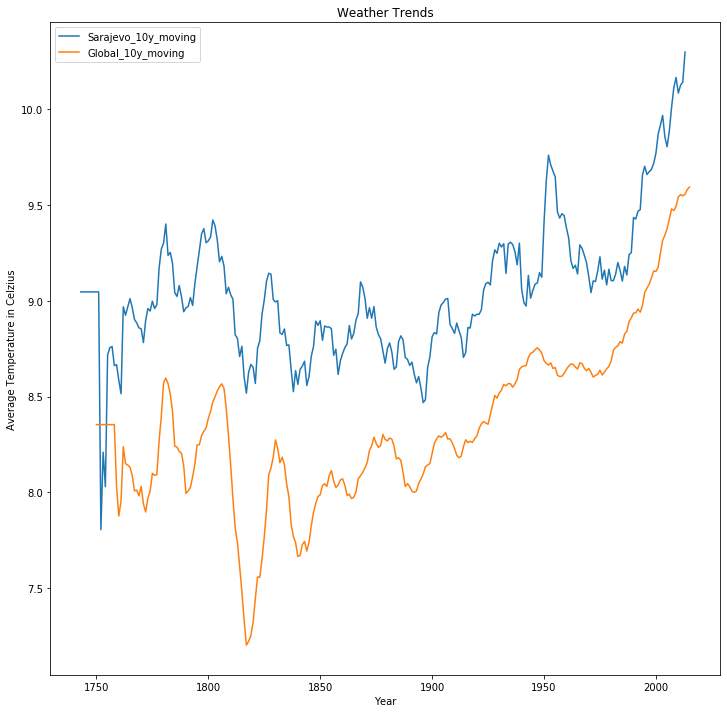

In [16]:
ax=df_sarajevo.plot(x="year",y="Sarajevo_10y_moving",figsize=(12,12));
df_global.plot(x="year",y="Global_10y_moving",ax=ax);
plt.title("Weather Trends")
plt.xlabel("Year")
plt.ylabel("Average Temperature in Celzius")

 ## Conclusion
 

From the above chart we can conclude that average year temperature in Sarajevo is heigher then global average temperature. Average year temperature fluctuation in Sarajevo is similar to global trend.
Overall average temperature is getting heigher over the time.

Increase trend in average year temperature from 1980. has been consistent. 